In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 评价指标

In [2]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [3]:
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_squared_error(y_true, y_pred), mean_absolute_error(y_true, y_pred)

(0.375, 0.5)

In [4]:
np.mean((np.array(y_true) - np.array(y_pred))**2), np.mean(np.abs((np.array(y_true) - np.array(y_pred))))

(0.375, 0.5)

In [5]:
# R方评价，越接近1越好
r2_score(y_true, y_pred)

0.9486081370449679

$R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$

In [6]:
1- np.sum((np.array(y_true) - np.array(y_pred))**2) / np.sum((np.array(y_true) - np.mean(y_true))**2)

0.9486081370449679

# 准备数据

In [7]:
from sklearn import datasets

In [11]:
#data = datasets.make_regression(n_samples=1000, n_features=5, n_informative=5, n_targets=1, bias=10, noise=20)

+ n_samples：样本数  
+ n_features：特征数(自变量个数)  
+ n_informative：相关特征(相关自变量个数)即参与了建模型的特征数  
+ n_targets：因变量个数  
+ bias：偏差(截距)  
+ coef：是否输出coef标识  

In [14]:
data = datasets.load_boston()

# 机器学习方法

In [15]:
X = data['data']
Y = data['target']
X.shape,Y.shape

((506, 13), (506,))

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

In [17]:
reg1 = LinearRegression()
reg2 = RidgeCV(alphas=[1, 0.2, 10])
reg3 = LassoCV(alphas=[0.1, 1, 10])

In [18]:
reg1.fit(X,Y)
reg2.fit(X,Y)
reg3.fit(X,Y)

LassoCV(alphas=[0.1, 1, 10])

In [19]:
reg1.score(X,Y), reg2.score(X,Y),reg3.score(X,Y)

(0.7406426641094094, 0.7404920401548895, 0.7269834862602695)

In [20]:
reg1.get_params(), reg1.coef_,  reg1.intercept_

({'copy_X': True,
  'fit_intercept': True,
  'n_jobs': None,
  'normalize': False,
  'positive': False},
 array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
        -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
         3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
        -5.24758378e-01]),
 36.45948838509008)

In [21]:
reg2.alpha_,reg3.alpha_

(0.2, 0.1)

In [22]:
predict = reg2.predict(X)

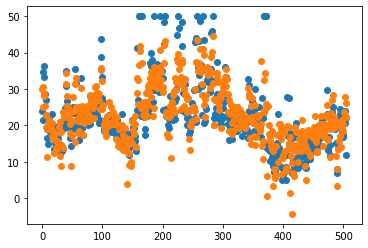

In [23]:
plt.scatter(range(len(Y)), Y)
plt.scatter(range(len(Y)), predict)

In [24]:
mean_squared_error(Y,predict)

21.907546789116264

# 深度学习方法

In [49]:
X = data['data']
Y = data['target'].reshape(-1,1)
X.shape,Y.shape

((506, 13), (506, 1))

In [50]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch import nn
from torch.nn import functional as F
from torch import optim

In [51]:
# 数据随机batch模块
class DiabetesDataset(Dataset):
    def __init__(self, x_, y_):
        self.len = x_.shape[0]
        self.x_data = torch.from_numpy(x_)
        # 这部很关键， 特征类型要求float类型
        self.x_data = self.x_data.float()

        self.y_data = torch.from_numpy(y_)
        self.y_data = self.y_data.float()

    def __getitem__(self, item):
        return self.x_data[item], self.y_data[item]

    def __len__(self):
        return self.len

In [52]:
dataset = DiabetesDataset(X, Y)
train_loader = DataLoader(dataset=dataset, batch_size=100, shuffle=True)

In [54]:
#网络结构
class NeuralNet(nn.Module):
    def __init__(self, input_size_, hidden_size_1, hidden_size_2, num_classes_):
        super().__init__()
        self.fc1 = nn.Linear(input_size_, hidden_size_1) 
        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2) 
        self.fc3 = nn.Linear(hidden_size_2, num_classes_)
    
    def forward(self, x):
        out = self.fc1(x)
        out = F.relu(out)
        out = self.fc2(out)
        out = F.relu(out)
        out = self.fc3(out)
        return out

In [55]:
model = NeuralNet(13, 7, 3, 1)
#损失函数
criterion = nn.MSELoss(reduction='mean')
#优化算法
optimizer = optim.Adam(model.parameters(), lr=0.01)

total_step = len(train_loader)
num_epochs = 2000
for epoch in range(num_epochs):
    for i, (x, y) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        x = x.reshape(-1, 13)
        # Forward pass
        outputs = model(x)
        loss = criterion(outputs, y)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        #输出中间信息
        if i % 5 == 0 and epoch%500==0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))

Epoch [1/2000], Step [1/6], Loss: 491.0155
Epoch [1/2000], Step [6/6], Loss: 230.4301
Epoch [501/2000], Step [1/6], Loss: 14.7903
Epoch [501/2000], Step [6/6], Loss: 1.4991
Epoch [1001/2000], Step [1/6], Loss: 15.8262
Epoch [1001/2000], Step [6/6], Loss: 22.8745
Epoch [1501/2000], Step [1/6], Loss: 20.6052
Epoch [1501/2000], Step [6/6], Loss: 4.9151


In [56]:
predict_deep = model(torch.from_numpy(X).float())

In [57]:
mean_squared_error(Y,predict_deep.detach().numpy())

13.133901028613408

In [58]:
# 保存模型
path = './reg.pth'
torch.save(model.state_dict(), path)

In [59]:
# 查看参数,保存模型时候保存的就是这些参数
pargram = model.state_dict()
pargram

OrderedDict([('fc1.weight',
              tensor([[-3.0034e-01,  1.5725e-01, -2.6802e-01, -2.1267e-01, -2.4143e-01,
                       -1.6959e-01, -2.7405e-01,  1.6033e-01,  1.9239e-01, -1.6463e-01,
                       -5.5064e-02, -3.4731e-02,  1.7480e-01],
                      [ 8.8046e-01,  1.1913e+00,  1.3887e+00, -4.4085e+00, -2.8481e+00,
                        2.5663e-01,  9.5329e-01, -5.8643e+00, -4.6895e-01,  8.0245e-02,
                       -2.0716e+00, -1.2444e-01, -4.3277e+00],
                      [-1.3782e-01,  1.2946e-01,  8.4082e-03,  2.4420e-01,  1.4433e-01,
                       -1.0596e-01,  2.3029e-01,  4.1246e-02, -7.7285e-02, -2.7710e-01,
                       -1.1892e-01,  8.5188e-02,  4.9427e-03],
                      [ 3.3132e+00, -2.5339e-02, -5.2003e-01, -4.2025e+00, -3.2981e-01,
                       -3.9137e+00, -1.7737e-01,  6.6557e-01, -6.9052e-01,  2.4531e-02,
                        1.4616e-01, -1.8305e-01, -1.2489e+00],
                

下面是整个神经网络结构图，第一层输入层13个特征，中间层分别是7个神经元和3个神经元，最后的输出层是1

![](.\img\img1.png)

In [64]:
pargram['fc1.weight'].shape

torch.Size([7, 13])

In [61]:
# 加载模型
model = NeuralNet(13, 7, 3, 1)
model.load_state_dict(torch.load('./reg.pth'))
#必须调用model.eval()将dropout和batch normalization层设置为测试模式，不然会导致不一致的结果。
model.eval()

NeuralNet(
  (fc1): Linear(in_features=13, out_features=7, bias=True)
  (fc2): Linear(in_features=7, out_features=3, bias=True)
  (fc3): Linear(in_features=3, out_features=1, bias=True)
)

In [62]:
#预测
predict_deep2 = model(torch.from_numpy(X).float())
mean_squared_error(Y,predict_deep2.detach().numpy())

13.133901028613408

# XGBOOST方法

In [1]:
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'

In [68]:
X = data['data']
Y = data['target'].reshape(-1,1)
X.shape,Y.shape

((506, 13), (506, 1))

In [71]:
#数据转换成Dmatrix格式，xgboost必须
xgtrain = xgb.DMatrix(X, Y)

1 101:1.2 102:0.03  
0 1:2.1 10001:300 10002:400  
0 0:1.3 1:0.3  
1 0:0.01 1:0.3  
0 0:0.2 1:0.3  
每行代表一个实例，第一行'1'是实例标签，'101'和'102'是特征索引，'1.2'和'0.03'是特征值。  
这种方式只记录有数值的特征的索引号，其他的都不记录达到节省内存效果，稀疏矩阵。  

In [88]:
#参数设置
params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',  # 均分误差
    'gamma': 0.1,                  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
    'max_depth': 50,               # 构建树的深度，越大越容易过拟合
    'lambda': 1,                   # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
    'subsample': 0.7,              # 随机采样训练样本
    'colsample_bytree': 0.7,       # 生成树时进行的列采样
    'min_child_weight': 3,
    'silent': 0,                   # 设置成1则没有运行信息输出，最好是设置为0.
    'eta': 0.02,                  # 如同学习率
    'seed': 1000,
    'nthread': 4,                  # cpu 线程数
}

In [89]:
#设定需要查看模型训练时的输出
watchlist = [(xgtrain,'tranin')]
num_round = 200
bst = xgb.train(params, xgtrain, num_round, watchlist)
#使用模型预测
preds = bst.predict(xgtrain)

[13:38:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	tranin-rmse:23.42431
[1]	tranin-rmse:22.99451
[2]	tranin-rmse:22.56057
[3]	tranin-rmse:22.14789
[4]	tranin-rmse:21.73189
[5]	tranin-rmse:21.32071
[6]	tranin-rmse:20.92844
[7]	tranin-rmse:20.55426
[8]	tranin-rmse:20.17270
[9]	tranin-rmse:19.79539
[10]	tranin-rmse:19.42514
[11]	tranin-rmse:19.07285
[12]	tranin-rmse:18.71902
[13]	tranin-rmse:18.36912
[14]	tranin-rmse:18.02548
[15]	tranin-rmse:17.69291
[16]	tranin-rmse:17.36348
[17]	tranin-rmse:17.03935
[18]	tranin-rmse:16.72038
[19]	tranin-rmse:16.41365
[20]	tranin-rmse:16.11544
[21]	tranin-rmse:15.82127
[22]	tranin-rmse:15.53478
[23]	tranin-rmse:15.24597


In [91]:
#模型评估
mean_squared_error(Y, preds)

1.6981245335226238